In [1]:
import sys
sys.path.insert(0, '../')

# Masks

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from yuntu import Audio
from yuntu.core.geometry import base as geom

In [2]:
SAMPLE_AUDIO = '/Users/erobredo/Downloads/11k16bitpcm.wav'
audio = Audio(path=SAMPLE_AUDIO)

In [3]:
spec = audio.features.db_spectrogram()
linestring = geom.LineString(vertices=[(0, 0), (1, 1000), (4,1000), (5, 0)])

In [4]:
mask = spec.to_mask(linestring.buffer([0.1, 200]))

In [5]:
audio_cut = audio.cut(start_time=4, end_time=8)

In [6]:
audio_mask = audio_cut.to_mask(linestring.buffer([0.1, 200]), lazy=True)

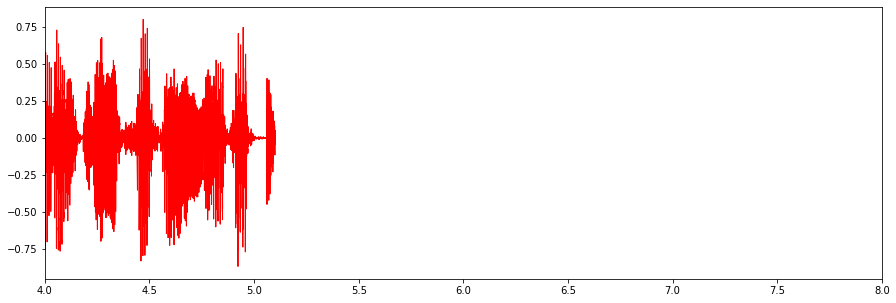

In [8]:
audio_mask.plot(figsize=(15, 5), media=True, mask=False, color='red')

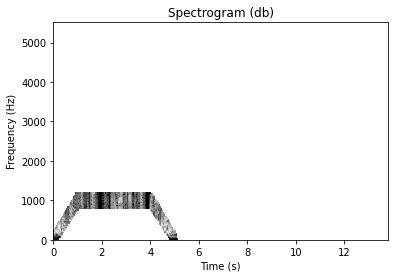

In [10]:
mask.plot(media=True, mask=False)

In [22]:
a = linestring.buffer([0.1, 200])

In [23]:
mask.to_dict()

{'time_axis': {'start': 0,
  'end': 13.811065759637188,
  'resolution': 21.576901101354856},
 'frequency_axis': {'start': 0,
  'end': 5512.5,
  'resolution': 0.09306122448979592},
 'geometry': {'type': 'Polygon',
  'wkt': 'POLYGON ((0.9552786404500042 1178.885438199983, 0.9637528762752411 1186.398991646221, 0.9725385692958957 1192.310892293533, 0.981560227527313 1196.570341518303, 0.9907403314291259 1199.140739558309, 1 1200, 4 1200, 4.009259668570874 1199.140739558309, 4.018439772472687 1196.570341518303, 4.027461430704104 1192.310892293533, 4.036247123724759 1186.398991646221, 4.044721359549996 1178.885438199983, 5.044721359549996 178.8854381999832, 5.053272933529653 169.2571363712049, 5.061311460037472 157.9987957938096, 5.068759523668877 145.2188404419924, 5.075545395499571 131.0403482720256, 5.081603723874291 115.5998659142581, 5.086876163778967 99.04609365442161, 5.091311938735111 81.53845336859062, 5.094868329805051 63.24555320336744, 5.097511086998666 44.34356378725962, 5.09921

In [25]:
roi = linestring.buffer([0.1, 200])
mask = spec.to_mask(roi)
values = spec[mask]
print(np.mean(values))

-5.0747523


In [26]:
shell = [(2, 1000), (3, 1500), (4, 4500), (0, 3300)]
holes = [
    [(1, 3000), (2, 1500), (2.5, 2500)],
    [(2.5, 3500), (3, 4000), (3.5, 3400)]
]

polygon = geom.Polygon(shell=shell, holes=holes)

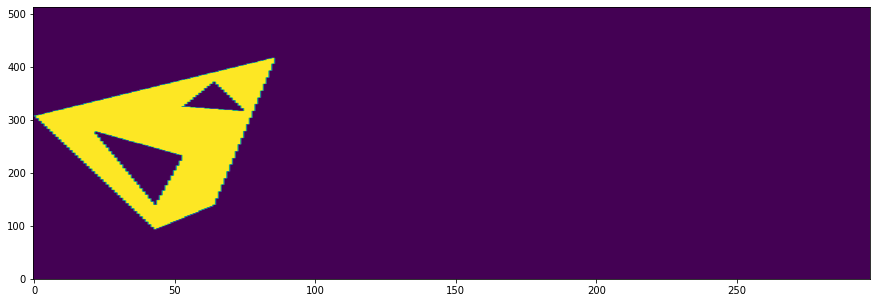

In [27]:
plt.figure(figsize=(15, 5))
plt.imshow(spec.to_mask(polygon), origin='bottom', aspect='auto')

In [28]:
from yuntu.core.geometry.utils import geometry_neighbourhood
from yuntu.core.geometry.utils import geometry_to_mask

In [29]:
mask = geometry_to_mask(
    linestring.geometry,
    shape=spec.shape,
    transformX=spec.get_index_from_time,
    transformY=spec.get_index_from_frequency)

In [30]:
spec.shape

Shape(rows=513, columns=298)

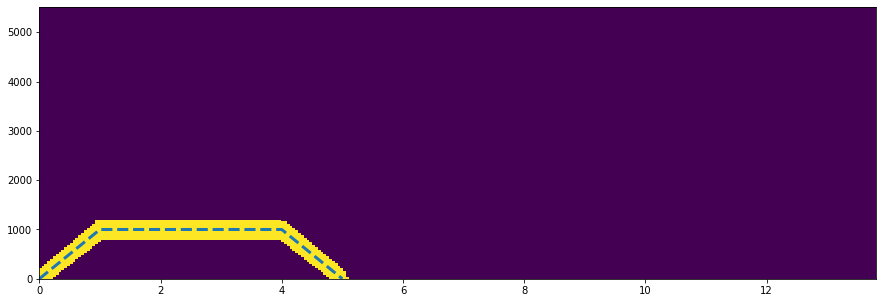

In [31]:
_, ax = plt.subplots(figsize=(15, 5))
plt.pcolormesh(spec.times, spec.frequencies, spec.to_mask(linestring.buffer([0.1, 200])))
linestring.plot(ax=ax, linewidth=3)

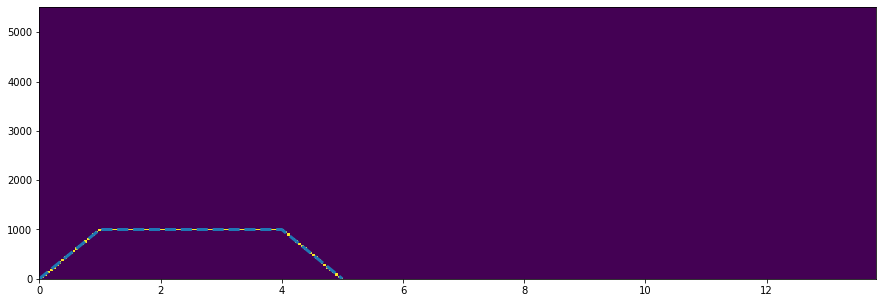

In [32]:
_, ax = plt.subplots(figsize=(15, 5))
ax.pcolormesh(spec.times, spec.frequencies, mask)
linestring.plot(ax=ax, linewidth=3)

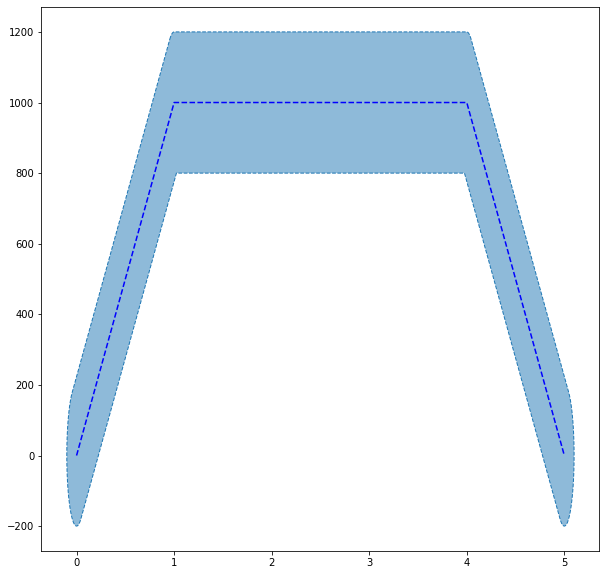

In [33]:
ax = linestring.buffer([0.1, 200]).plot()
linestring.plot(ax=ax, color='blue')

In [34]:
from yuntu.core.geometry.utils import point_buffer

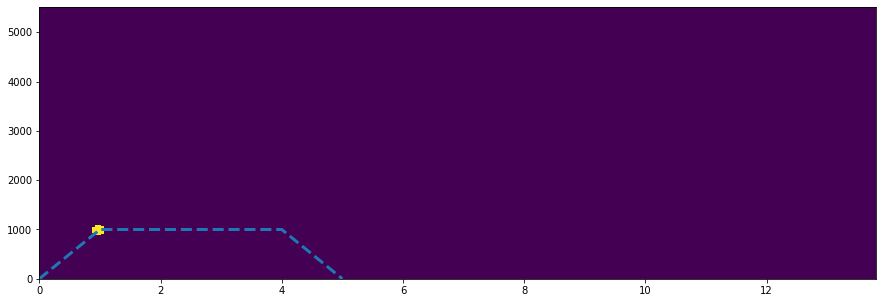

In [35]:
X, Y = zip(*linestring)

p_buffer = point_buffer(X[1], Y[1], [0.1, 100])

_, ax = plt.subplots(figsize=(15, 5))
plt.pcolormesh(spec.times, spec.frequencies, spec.to_mask(p_buffer))
linestring.plot(ax=ax, linewidth=3)

In [36]:
spec.get_aggr_value(time=1, freq=1000, buffer=[0.05, 50], aggr_func=lambda x: np.percentile(x, 90))

-3.215039920806885

In [37]:
from yuntu.core.windows import TimeFrequencyWindow

In [38]:
ftwindow = TimeFrequencyWindow(start=2, end=6, min=1000, max=3000)

In [39]:
window = ftwindow.to_time()

In [40]:
spec.get_aggr_value(window=ftwindow)

-8.093801

In [41]:
spec.get_aggr_value(window=ftwindow, buffer=[0.1, 50])

-7.35269

In [42]:
spec.get_aggr_value(geometry=linestring.buffer(time=0.1, freq=200))

-5.0747523

In [43]:
spec.get_aggr_value(geometry=linestring.buffer([0.1, 200]), bins=5)

-5.9707212

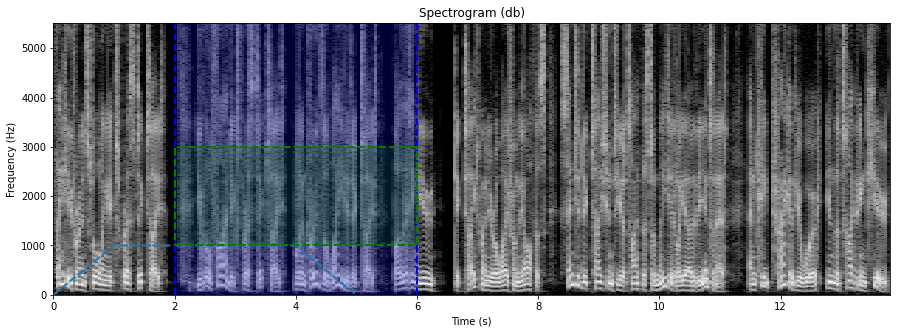

In [44]:
_, ax = plt.subplots(figsize=(15, 5))
spec.plot(ax=ax)
linestring.plot(ax=ax, linewidth=2)
window.plot(ax=ax, linewidth=2)
ftwindow.plot(ax=ax, color='green', linewidth=2)

In [45]:
ftwindow.to_dict()

{'start': 2, 'end': 6, 'min': 1000, 'max': 3000, 'type': 'TimeFrequencyWindow'}